In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('concrete.csv')

In [3]:
print(data.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64


H:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


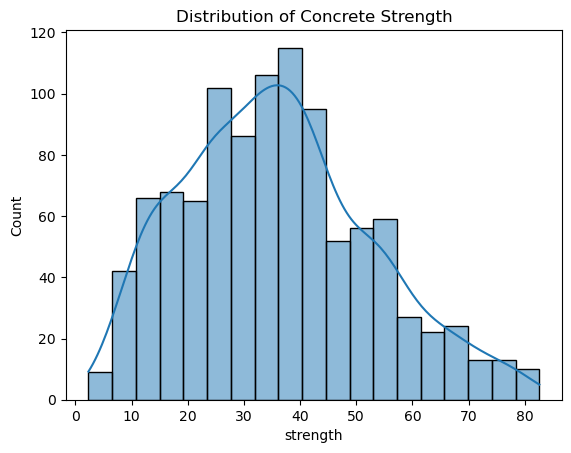

In [4]:
sns.histplot(data['strength'], kde=True)
plt.title("Distribution of Concrete Strength")
plt.show()

H:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
H:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
H:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
H:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

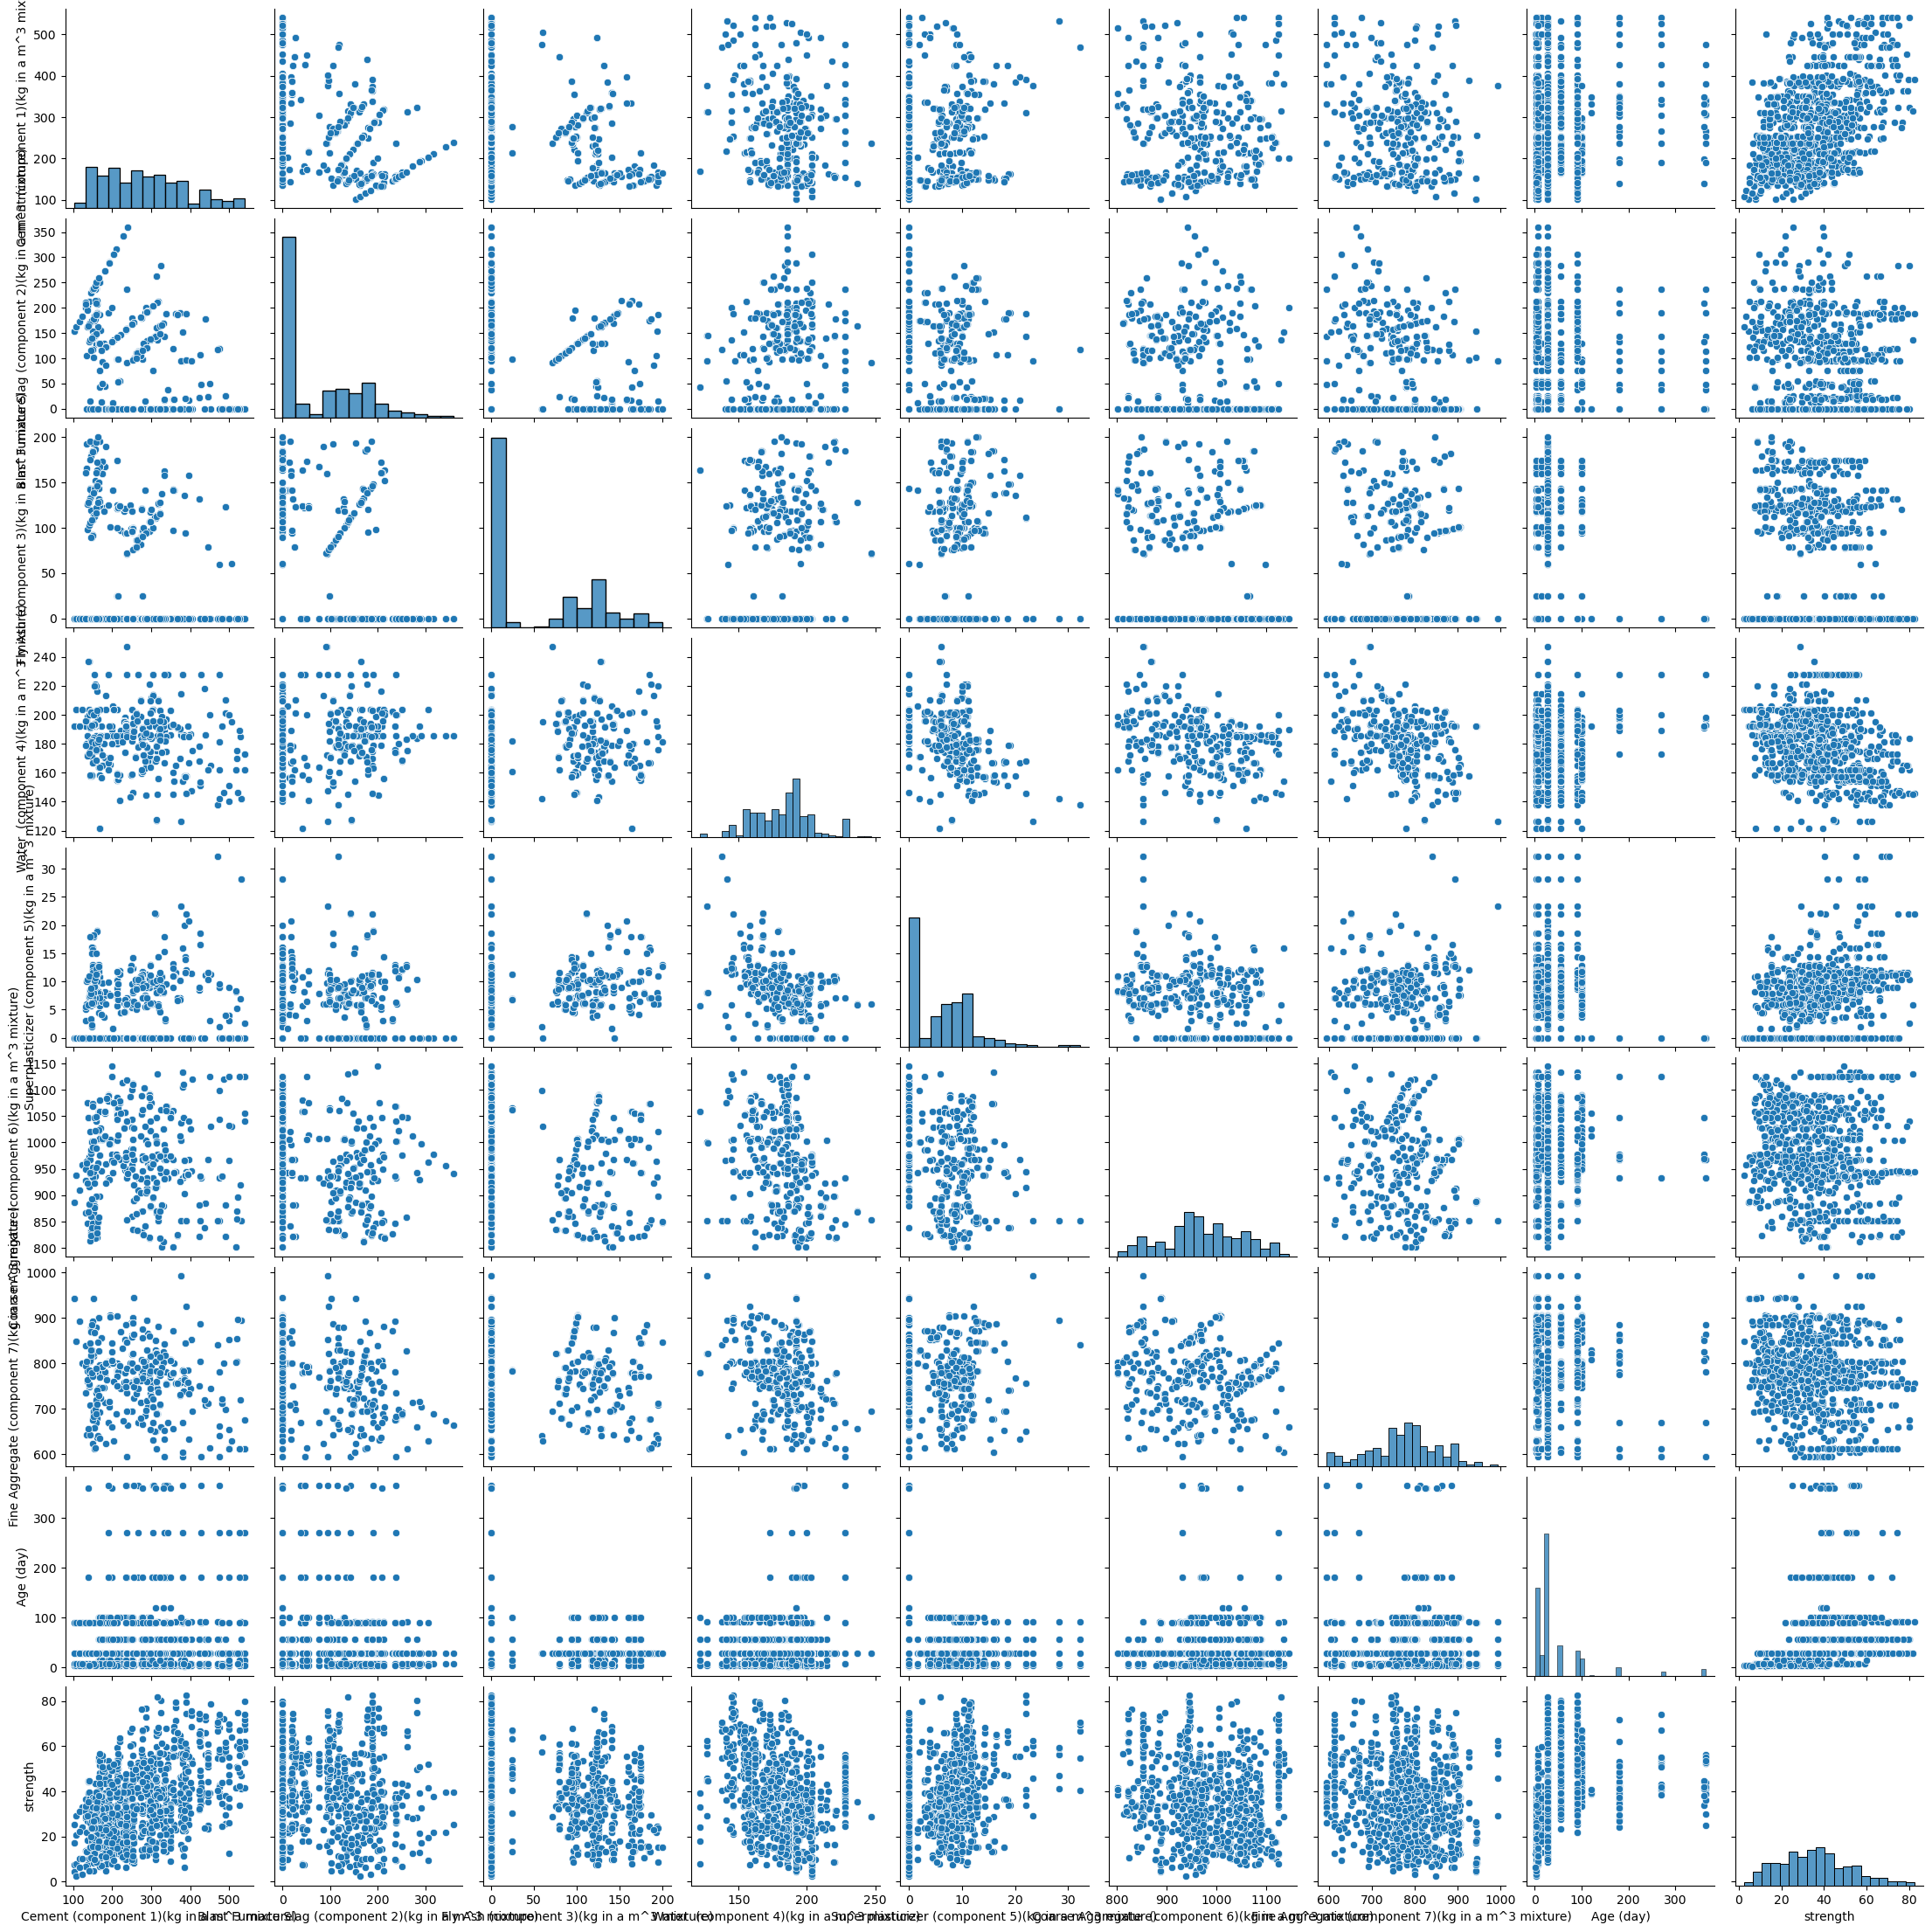

In [5]:
sns.pairplot(data)
plt.show()

In [6]:
X = data.drop(columns = ['strength'])
y = data ['strength']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [16]:
linear_reg = LinearRegression()
random_forest = RandomForestRegressor (n_estimators=100, random_state=42)
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)



In [17]:
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")
    print("-" * 50)
    
    

In [19]:
evaluate_model(linear_reg, X_test, y_test)
evaluate_model(random_forest, X_test, y_test)
evaluate_model(xgb_reg, X_test, y_test)

Model: LinearRegression
MAE: 7.746, MSE: 95.971, RMSE: 9.796, R2: 0.628
--------------------------------------------------
Model: RandomForestRegressor
MAE: 3.738, MSE: 29.942, RMSE: 5.472, R2: 0.884
--------------------------------------------------
Model: XGBRegressor
MAE: 3.258, MSE: 24.699, RMSE: 4.970, R2: 0.904
--------------------------------------------------


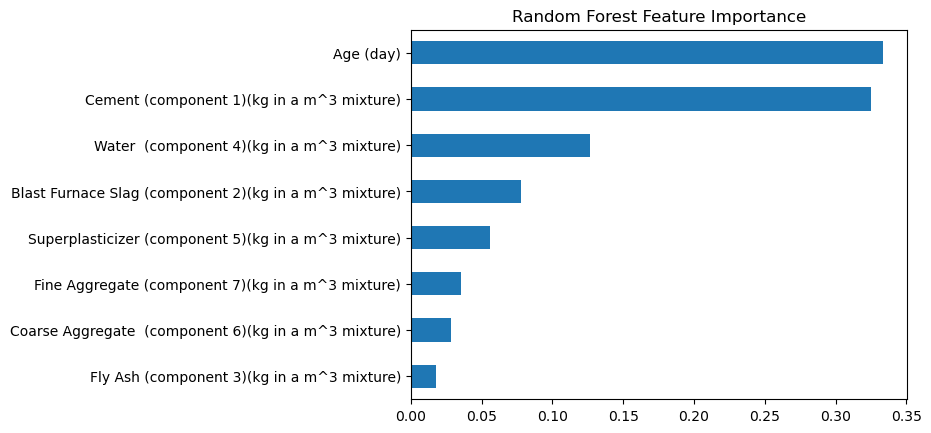

In [23]:
feat_importances_rf = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances_rf.sort_values().plot(kind='barh', title='Random Forest Feature Importance')
plt.show()

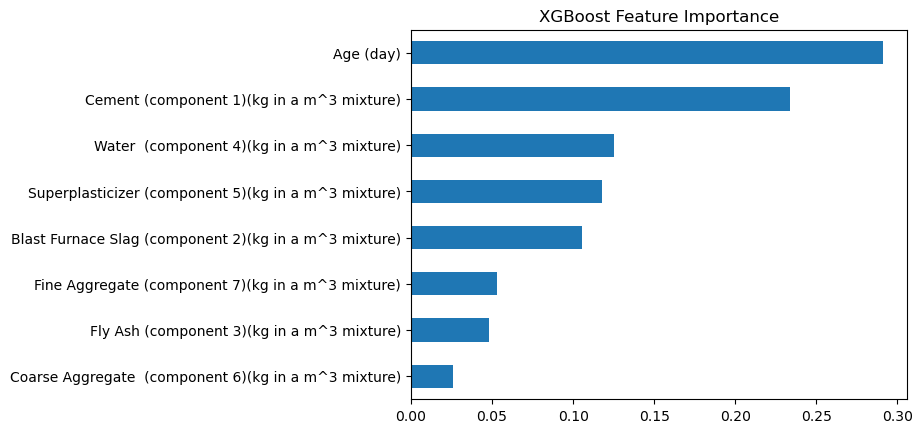

In [26]:
feat_importances_xgb = pd.Series(xgb_reg.feature_importances_, index=X.columns)
feat_importances_xgb.sort_values().plot(kind='barh', title='XGBoost Feature Importance')
plt.show()